In [2]:
#importing important library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import matplotlib.pyplot as plt
%matplotlib inline
#TO show all the rows of pandas dataframe
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('drugsComTrain_raw.tsv', sep='\t')##loading the dataset

In [4]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df['condition'].value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [6]:
df.shape


(161297, 7)

In [7]:
#Taking all those with count >1000
df_train=df[(df['condition']=='Birth Control') | (df['condition']=='Depression')|
             (df['condition']=='Pain')| (df['condition']=='Anxiety')|
            (df['condition']=='Acne')| (df['condition']=='Bipolar Disorde')|
            (df['condition']=='Insomnia')|(df['condition']=='Weight Loss')|
            (df['condition']=='Obesity')| (df['condition']=='ADHD')|(df['condition']=='High Blood Pressure')| (df['condition']=='Diabetes, Type 2')]

In [8]:
df_train.shape

(78826, 7)

In [9]:
#We just need condition and review so lets drop all other column in the dataset
X=df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [10]:
X.head()

,condition,review
1,ADHD,"""My son is halfway through his fourth week of ..."
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
7,Bipolar Disorde,"""Abilify changed my life. There is hope. I was..."
9,Birth Control,"""I had been on the pill for many years. When m..."


# Now WE will go through EDA

In [11]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Pain                    6145
Anxiety                 5904
Acne                    5588
Bipolar Disorde         4224
Insomnia                3673
Weight Loss             3609
Obesity                 3568
ADHD                    3383
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [18]:
#segregating datframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_depression=X[(X['condition']=='Depression')]

Text(0.5, 1.0, 'Word cloud for Birth Control')

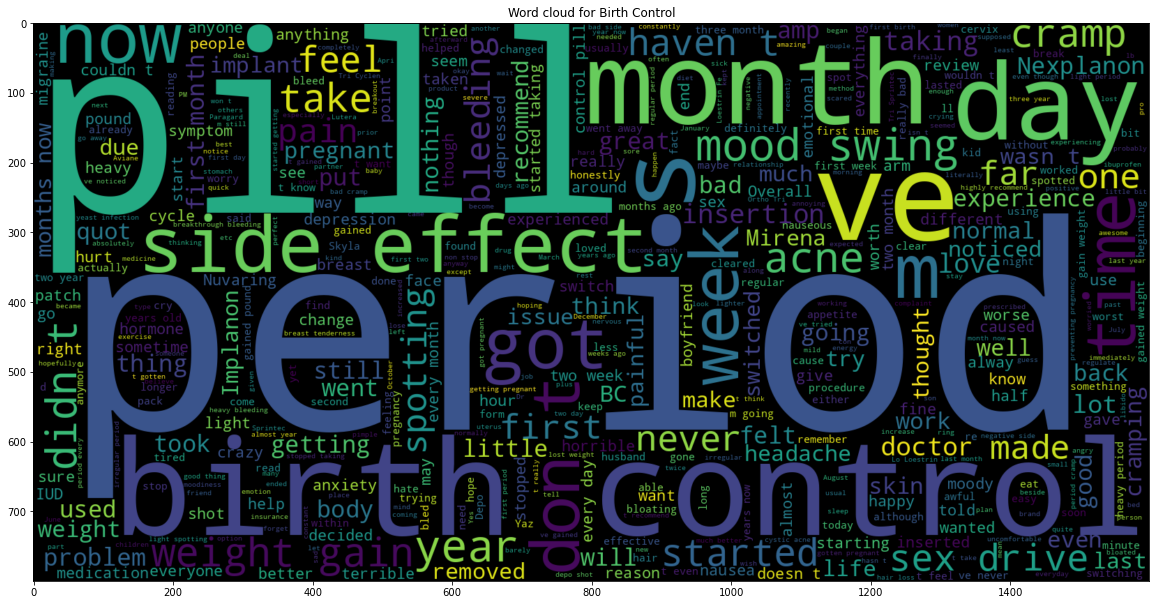

In [19]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth Control')

Text(0.5, 1.0, 'Word cloud for Depression')

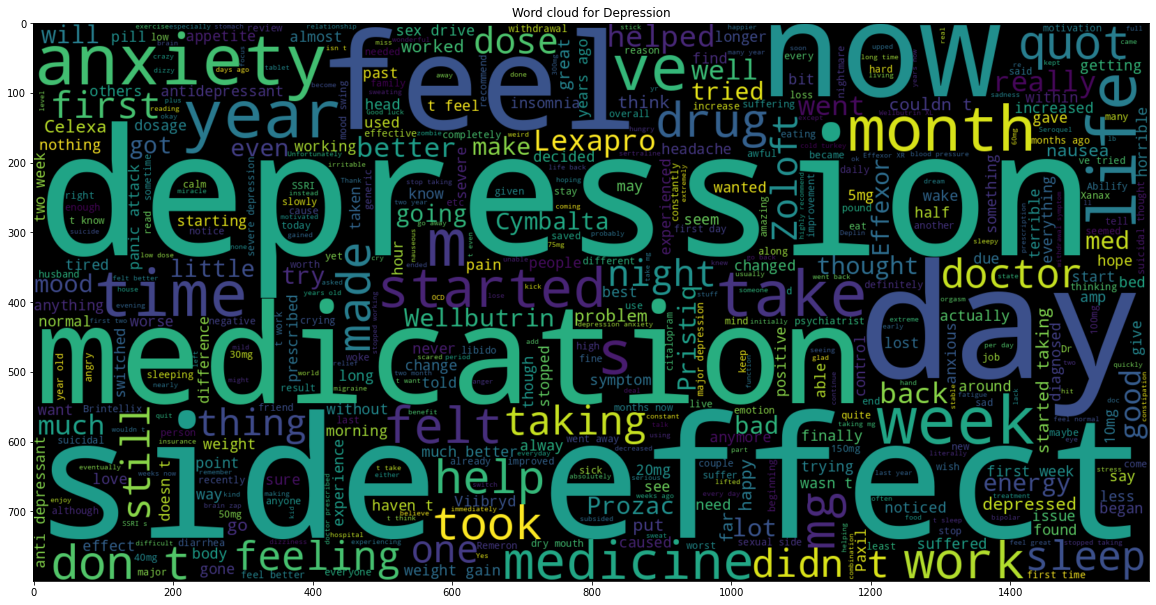

In [20]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_depression.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression')

In [42]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [47]:
#Removing double quote from our dataset
for i, col in enumerate(X.columns):
    X.iloc[:, i]= X.iloc[:, i].str.replace('"','')

In [48]:
X['review'][2]

'I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.'

In [49]:
X.head()

,condition,review
1,ADHD,My son is halfway through his fourth week of I...
2,Birth Control,"I used to take another oral contraceptive, whi..."
3,Birth Control,This is my first time using any form of birth ...
7,Bipolar Disorde,Abilify changed my life. There is hope. I was ...
9,Birth Control,I had been on the pill for many years. When my...


In [71]:
#importing nltk library
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/prabhat-
[nltk_data]     ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/prabhat-
[nltk_data]     ubuntu/nltk_data...


True

In [67]:
from bs4 import BeautifulSoup#for html page scrapping
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop=stopwords.words('english')

porter=PorterStemmer()
lemmatizer= WordNetLemmatizer()

In [72]:
def preprocess(text):
    #Delete HTML
    review_text=BeautifulSoup(text,'html.parser').get_text()
    #Make a space
    letters_only=re.sub('[^a-zA-Z]',' ',review_text)
    #Lower Letters
    words=letters_only.lower().split()
    #remove stop words 
    meaning_words=[w for w in words if not w in stop]
    #lemmitiztion
    lemmitize_words=[lemmatizer.lemmatize(w) for w in meaning_words]
    
    return (' '.join(lemmitize_words) )

In [73]:
X['preprocessed_review']=X['review'].apply(preprocess)

In [74]:
X.head()

,condition,review,preprocessed_review
1,ADHD,My son is halfway through his fourth week of I...,son halfway fourth week intuniv became concern...
2,Birth Control,"I used to take another oral contraceptive, whi...",used take another oral contraceptive pill cycl...
3,Birth Control,This is my first time using any form of birth ...,first time using form birth control glad went ...
7,Bipolar Disorde,Abilify changed my life. There is hope. I was ...,abilify changed life hope zoloft clonidine fir...
9,Birth Control,I had been on the pill for many years. When my...,pill many year doctor changed rx chateal effec...


# Creating features and Target Variable

In [75]:
X_feed=X['preprocessed_review']
y=X['condition']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    X_feed, 
    y, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=y #for even distribution of sample
)

In [77]:
#create a pipeline object

clf = Pipeline([
     ('vectorizer_bow', CountVectorizer()), 
     ('mnb', MultinomialNB())       
])


In [78]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('mnb', MultinomialNB())])

In [79]:
y_pred = clf.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix
cm_test  = confusion_matrix(y_test, y_pred)
cm_test

array([[ 543,    0,   10,    8,   16,   63,    1,    2,   12,    3,   11,
           7],
       [   0, 1004,    2,    2,   95,    5,    0,    2,    0,    2,    4,
           2],
       [   4,    3,  748,   16,   22,  328,    0,    2,   36,    3,   18,
           1],
       [   9,    1,   45,  548,   24,  170,    2,    7,   26,    2,   10,
           1],
       [   0,   42,    9,    4, 5643,   25,    2,    9,    1,    7,   10,
           6],
       [  12,    5,  123,   60,   36, 1501,    3,    9,   24,    8,   23,
          10],
       [   0,    1,    1,    2,   12,    9,  430,    7,    1,   25,    8,
          15],
       [   0,    3,   15,    1,   10,   36,    4,  363,    4,    2,   17,
           9],
       [   4,    0,   34,    5,   15,   48,    2,    0,  611,    3,   12,
           1],
       [   1,    3,    1,    3,    7,   21,   12,    3,    1,  441,    3,
         217],
       [   1,    7,   13,    2,   28,   45,    0,    6,   14,    0, 1112,
           1],
       [   0,    0,  

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8525307624001015

# Passive Aggressive Classifier

In [83]:
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer()), 
     ('passive', PassiveAggressiveClassifier())       
])


In [84]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('passive', PassiveAggressiveClassifier())])

In [85]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8728910313332487

In [86]:
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()), 
     ('passive', PassiveAggressiveClassifier())       
])

In [87]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('passive', PassiveAggressiveClassifier())])

In [88]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.889001649118356

In [89]:
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()), 
     ('mnb', MultinomialNB())       
])

In [90]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('mnb', MultinomialNB())])

In [91]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6973867816821008

In [93]:
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,2))), 
     ('passive', PassiveAggressiveClassifier())       
])

In [94]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('passive', PassiveAggressiveClassifier())])

In [95]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9215400228339464

In [96]:
clf = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1,3))), 
     ('passive', PassiveAggressiveClassifier())       
])

In [97]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer(ngram_range=(1, 3))),
                ('passive', PassiveAggressiveClassifier())])

In [98]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9244576937714069

In [99]:
text=["I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge"]

In [100]:
pred1=clf.predict(text)
pred1

array(['Birth Control'], dtype='<U19')

In [101]:
text=["I have been taking Saxenda since July 2016.  I had severe nausea for about a month once I got up to the 2.6 dosage.  It has since subsided and the only side effect I notice now is the dry mouth.  I make sure to drink  2.5 litres of water a day (about 10 glasses).  This helps with the weight loss as well as the constipation.  I have been reducing my dose to find a comfortable spot where I am still losing weight but don&#039;t feel like I am over medicating.  For me, 1.8 is working very well.  I also feel wearing a Fitbit has really helped.  I can track my food, water, exercise and steps - it keeps me moving more.  When this started I could barely walk the length of myself without getting winded - I have lost 58 lbs so far."]

In [102]:
pred1=clf.predict(text)
pred1

array(['Obesity'], dtype='<U19')